In [52]:
import requests
from bs4 import BeautifulSoup
import time

class JobScraper:
    def __init__(self, base_url, area, occupation):
        self.base_url = base_url
        self.area = area
        self.occupation = occupation

    def get_job_count(self):
        # 動的にURLを生成
        url = f"{self.base_url}/jlist/{self.area}/{self.occupation}/"
        try:
            res = requests.get(url, timeout=10)
            soup = BeautifulSoup(res.text, "html.parser")

            # 求人数を取得
            elems = soup.select("#js-job-count")  # IDセレクタで要素を取得
            if elems:
                job_count = elems[0].get_text(strip=True)
                job_count = job_count.split("件")[0].replace(",", "")
                return int(job_count)
            else:
                return 0
        except Exception as e:
            print(f"エラーが発生しました: {e}")
            return None

# 地域と職種を定義
regions = ["tokyo", "kanagawa", "chiba", "saitama", "ibaraki", "tochigi", "gumma"]
occupations = ["sales", "food", "service", "event", "lightwork", "production", "architecture", "business", "office", "creative", "education", "medicalcare", "beauty", "investigation", "professional", "nightwork"]
  # 必要に応じて他の職種を追加可能

# Base URL
BASE_URL = "https://www.baitoru.com/kanto"

# 地域と職種ごとに求人数を取得
def main():
    results = []
    for region in regions:
        for occupation in occupations:
            scraper = JobScraper(BASE_URL, region, occupation)
            job_count = scraper.get_job_count()
            if job_count is not None:
                results.append(f"{region.capitalize()} の {occupation} の求人数: {job_count}")

    # まとめて出力
    print("\n".join(results))

time.sleep(1)

# 実行
main()


Tokyo の sales の求人数: 28042
Tokyo の food の求人数: 26547
Tokyo の service の求人数: 27414
Tokyo の event の求人数: 7449
Tokyo の lightwork の求人数: 36977
Tokyo の production の求人数: 6634
Tokyo の architecture の求人数: 7304
Tokyo の business の求人数: 4416
Tokyo の office の求人数: 37200
Tokyo の creative の求人数: 13185
Tokyo の education の求人数: 14143
Tokyo の medicalcare の求人数: 44038
Tokyo の beauty の求人数: 1907
Tokyo の investigation の求人数: 190
Tokyo の professional の求人数: 1978
Tokyo の nightwork の求人数: 916
Kanagawa の sales の求人数: 12360
Kanagawa の food の求人数: 12859
Kanagawa の service の求人数: 12304
Kanagawa の event の求人数: 3458
Kanagawa の lightwork の求人数: 21981
Kanagawa の production の求人数: 6240
Kanagawa の architecture の求人数: 3413
Kanagawa の business の求人数: 1665
Kanagawa の office の求人数: 10173
Kanagawa の creative の求人数: 2905
Kanagawa の education の求人数: 7826
Kanagawa の medicalcare の求人数: 30111
Kanagawa の beauty の求人数: 1049
Kanagawa の investigation の求人数: 134
Kanagawa の professional の求人数: 1188
Kanagawa の nightwork の求人数: 294
Chiba の sales の求人数: 7980
Chiba の f

In [11]:
%pip install matplotlib
%pip install pandas
%pip install sqlite3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
Note: you may need to restart the kernel to use updated packages.


In [12]:
import sqlite3

# データベースの作成と接続
conn = sqlite3.connect("job_counts.db")
cursor = conn.cursor()

# テーブル作成（存在しない場合）
cursor.execute("""
CREATE TABLE IF NOT EXISTS job_counts (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    region TEXT NOT NULL,
    occupation TEXT NOT NULL,
    count INTEGER NOT NULL
)
""")

# データをリスト化
data = [
    ("Tokyo", "sales", 28042), ("Tokyo", "food", 26547), ("Tokyo", "service", 27414),
    ("Tokyo", "event", 7449), ("Tokyo", "lightwork", 36977), ("Tokyo", "production", 6634),
    ("Tokyo", "architecture", 7304), ("Tokyo", "business", 4416), ("Tokyo", "office", 37200),
    ("Tokyo", "creative", 13185), ("Tokyo", "education", 14143), ("Tokyo", "medicalcare", 44038),
    ("Tokyo", "beauty", 1907), ("Tokyo", "investigation", 190), ("Tokyo", "professional", 1978),
    ("Tokyo", "nightwork", 916),
    ("Kanagawa", "sales", 12360), ("Kanagawa", "food", 12859), ("Kanagawa", "service", 12304),
    ("Kanagawa", "event", 3458), ("Kanagawa", "lightwork", 21981), ("Kanagawa", "production", 6240),
    ("Kanagawa", "architecture", 3413), ("Kanagawa", "business", 1665), ("Kanagawa", "office", 10173),
    ("Kanagawa", "creative", 2905), ("Kanagawa", "education", 7826), ("Kanagawa", "medicalcare", 30111),
    ("Kanagawa", "beauty", 1049), ("Kanagawa", "investigation", 134), ("Kanagawa", "professional", 1188),
    ("Kanagawa", "nightwork", 294),
    ("Chiba", "sales", 7980), ("Chiba", "food", 9492), ("Chiba", "service", 8108),
    ("Chiba", "event", 2068), ("Chiba", "lightwork", 13115), ("Chiba", "production", 4657),
    ("Chiba", "architecture", 2607), ("Chiba", "business", 1189), ("Chiba", "office", 6386),
    ("Chiba", "creative", 937), ("Chiba", "education", 4685), ("Chiba", "medicalcare", 18938),
    ("Chiba", "beauty", 735), ("Chiba", "investigation", 96), ("Chiba", "professional", 794),
    ("Chiba", "nightwork", 172),
    ("Saitama", "sales", 9613), ("Saitama", "food", 9877), ("Saitama", "service", 9274),
    ("Saitama", "event", 2343), ("Saitama", "lightwork", 16707), ("Saitama", "production", 6558),
    ("Saitama", "architecture", 2920), ("Saitama", "business", 1597), ("Saitama", "office", 6386),
    ("Saitama", "creative", 1056), ("Saitama", "education", 5470), ("Saitama", "medicalcare", 23349),
    ("Saitama", "beauty", 883), ("Saitama", "investigation", 127), ("Saitama", "professional", 840),
    ("Saitama", "nightwork", 236),
    ("Ibaraki", "sales", 2998), ("Ibaraki", "food", 3473), ("Ibaraki", "service", 2981),
    ("Ibaraki", "event", 373), ("Ibaraki", "lightwork", 6751), ("Ibaraki", "production", 4752),
    ("Ibaraki", "architecture", 1094), ("Ibaraki", "business", 815), ("Ibaraki", "office", 2919),
    ("Ibaraki", "creative", 740), ("Ibaraki", "education", 1436), ("Ibaraki", "medicalcare", 8246),
    ("Ibaraki", "beauty", 369), ("Ibaraki", "investigation", 49), ("Ibaraki", "professional", 561),
    ("Ibaraki", "nightwork", 93),
    ("Tochigi", "sales", 2165), ("Tochigi", "food", 2882), ("Tochigi", "service", 2374),
    ("Tochigi", "event", 282), ("Tochigi", "lightwork", 4329), ("Tochigi", "production", 3642),
    ("Tochigi", "architecture", 1059), ("Tochigi", "business", 788), ("Tochigi", "office", 1883),
    ("Tochigi", "creative", 489), ("Tochigi", "education", 940), ("Tochigi", "medicalcare", 6583),
    ("Tochigi", "beauty", 255), ("Tochigi", "investigation", 25), ("Tochigi", "professional", 487),
    ("Tochigi", "nightwork", 31),
    ("Gumma", "sales", 2272), ("Gumma", "food", 2420), ("Gumma", "service", 2324),
    ("Gumma", "event", 289), ("Gumma", "lightwork", 4491), ("Gumma", "production", 3086),
    ("Gumma", "architecture", 853), ("Gumma", "business", 700), ("Gumma", "office", 1871),
    ("Gumma", "creative", 407), ("Gumma", "education", 961), ("Gumma", "medicalcare", 6512),
    ("Gumma", "beauty", 387), ("Gumma", "investigation", 33), ("Gumma", "professional", 448),
    ("Gumma", "nightwork", 72)
]

# データを挿入
cursor.executemany("INSERT INTO job_counts (region, occupation, count) VALUES (?, ?, ?)", data)

# コミットして保存
conn.commit()

# データベース接続を閉じる
conn.close()

print("データがデータベースに保存されました。")


データがデータベースに保存されました。


/var/folders/6c/bmty0x1s5tn7499t08s2239r0000gn/T/ipykernel_99961/3748333313.py:27: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6c/bmty0x1s5tn7499t08s2239r0000gn/T/ipykernel_99961/3748333313.py:27: UserWarning: Glyph 22495 (\N{CJK UNIFIED IDEOGRAPH-57DF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6c/bmty0x1s5tn7499t08s2239r0000gn/T/ipykernel_99961/3748333313.py:27: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6c/bmty0x1s5tn7499t08s2239r0000gn/T/ipykernel_99961/3748333313.py:27: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6c/bmty0x1s5tn7499t08s2239r0000gn/T/ipykernel_99961/3748333313.py:27: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6c/bmty

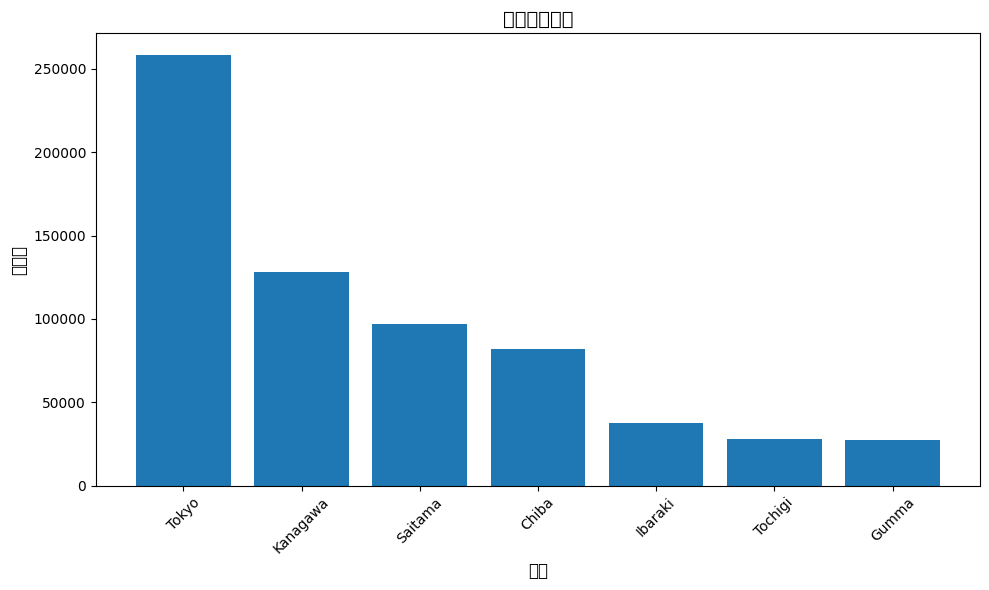

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# データベース接続
conn = sqlite3.connect("job_counts.db")

# データを取得
query = """
SELECT region, SUM(count) as total_jobs
FROM job_counts
GROUP BY region
ORDER BY total_jobs DESC
"""
df = pd.read_sql_query(query, conn)

# データベース接続を閉じる
conn.close()

# 棒グラフの作成
plt.figure(figsize=(10, 6))
plt.bar(df['region'], df['total_jobs'])
plt.title("各県の求人数", fontsize=14)
plt.xlabel("地域", fontsize=12)
plt.ylabel("求人数", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


/Users/mutouyuto/Lecture/DSprog2/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25509 (\N{CJK UNIFIED IDEOGRAPH-63A5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mutouyuto/Lecture/DSprog2/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23458 (\N{CJK UNIFIED IDEOGRAPH-5BA2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mutouyuto/Lecture/DSprog2/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mutouyuto/Lecture/DSprog2/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mutouyuto/Lecture/DSprog2/.venv/lib/python3.12/site-packages/IPyt

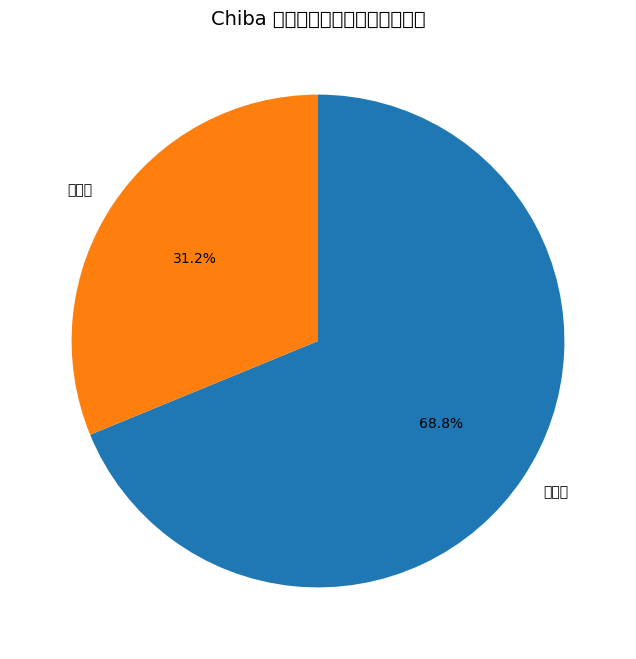

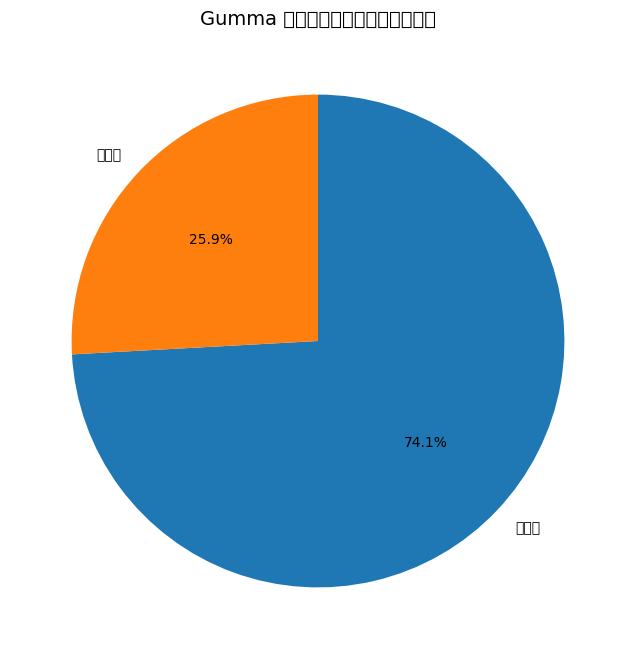

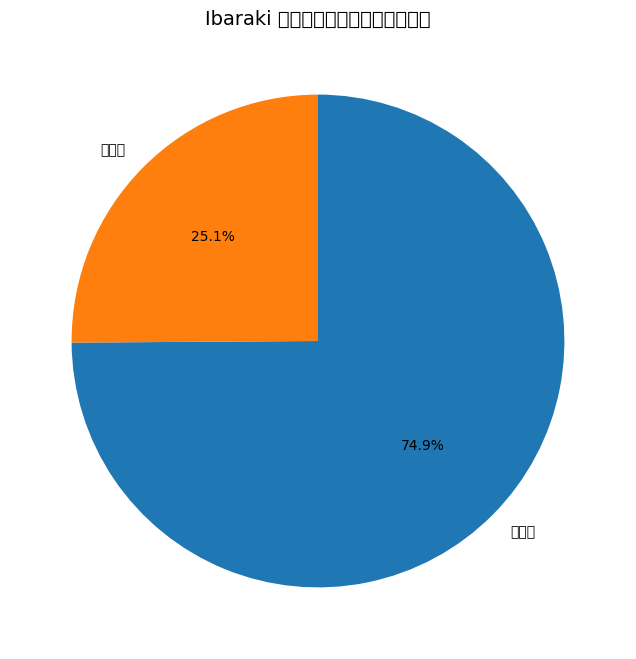

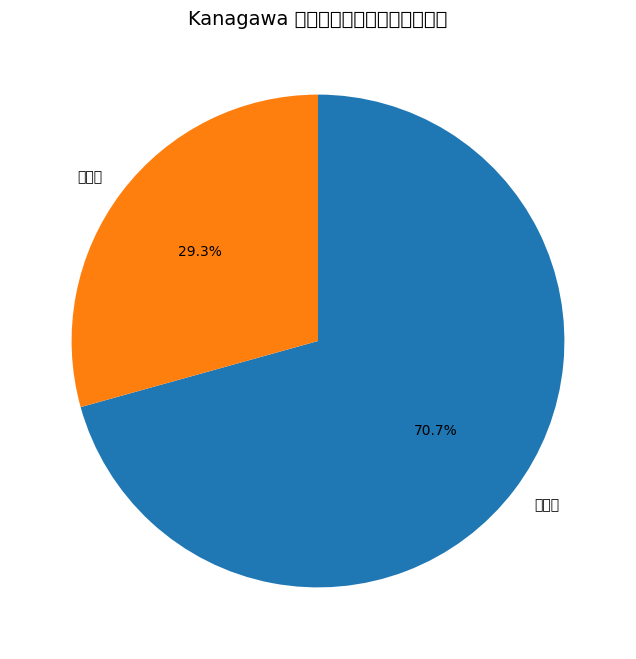

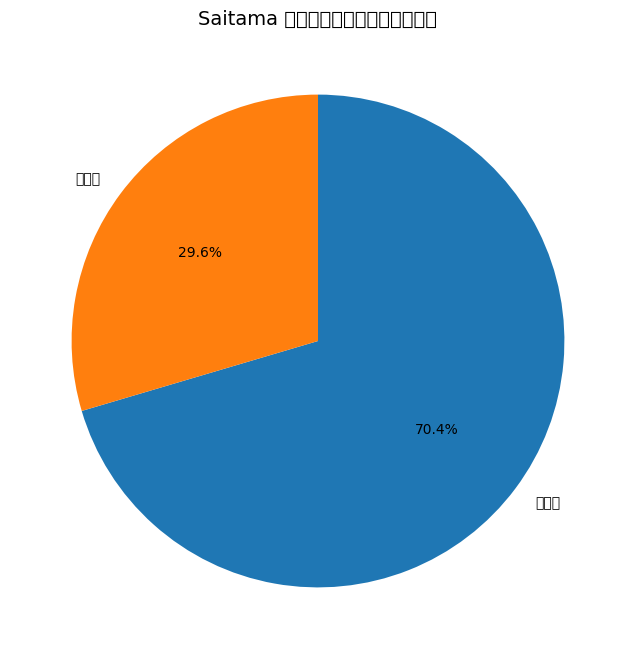

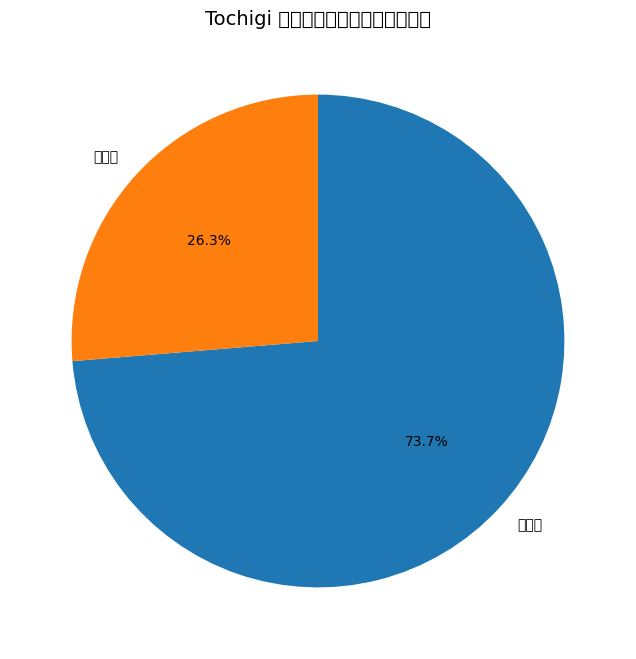

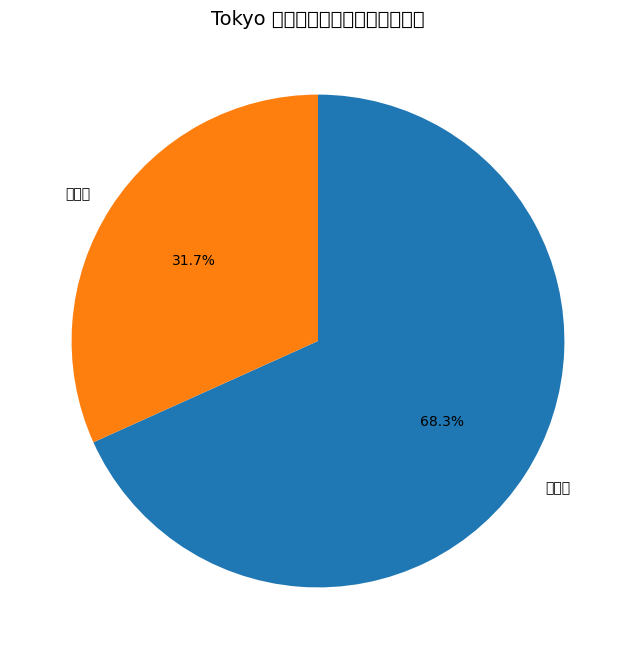

In [14]:
# データベースを再接続して再度実行
conn = sqlite3.connect("job_counts.db")

# 各県ごとに接客業とその他の求人数を集計
query = """
SELECT 
    region,
    CASE 
        WHEN occupation IN ('sales', 'food', 'service') THEN '接客業'
        ELSE 'その他'
    END AS category,
    SUM(count) as total_jobs
FROM job_counts
GROUP BY region, category
ORDER BY region, category
"""
df_grouped = pd.read_sql_query(query, conn)

# データベース接続を閉じる
conn.close()

# 各県ごとの円グラフを作成
regions = df_grouped['region'].unique()

for region in regions:
    region_data = df_grouped[df_grouped['region'] == region]
    plt.figure(figsize=(8, 8))
    plt.pie(
        region_data['total_jobs'],
        labels=region_data['category'],
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    plt.title(f"{region} の接客業とその他職業の割合", fontsize=14)
    plt.show()


/var/folders/6c/bmty0x1s5tn7499t08s2239r0000gn/T/ipykernel_99961/880380403.py:30: UserWarning: Glyph 32887 (\N{CJK UNIFIED IDEOGRAPH-8077}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6c/bmty0x1s5tn7499t08s2239r0000gn/T/ipykernel_99961/880380403.py:30: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6c/bmty0x1s5tn7499t08s2239r0000gn/T/ipykernel_99961/880380403.py:30: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6c/bmty0x1s5tn7499t08s2239r0000gn/T/ipykernel_99961/880380403.py:30: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6c/bmty0x1s5tn7499t08s2239r0000gn/T/ipykernel_99961/880380403.py:30: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6c/bmty0x1s5

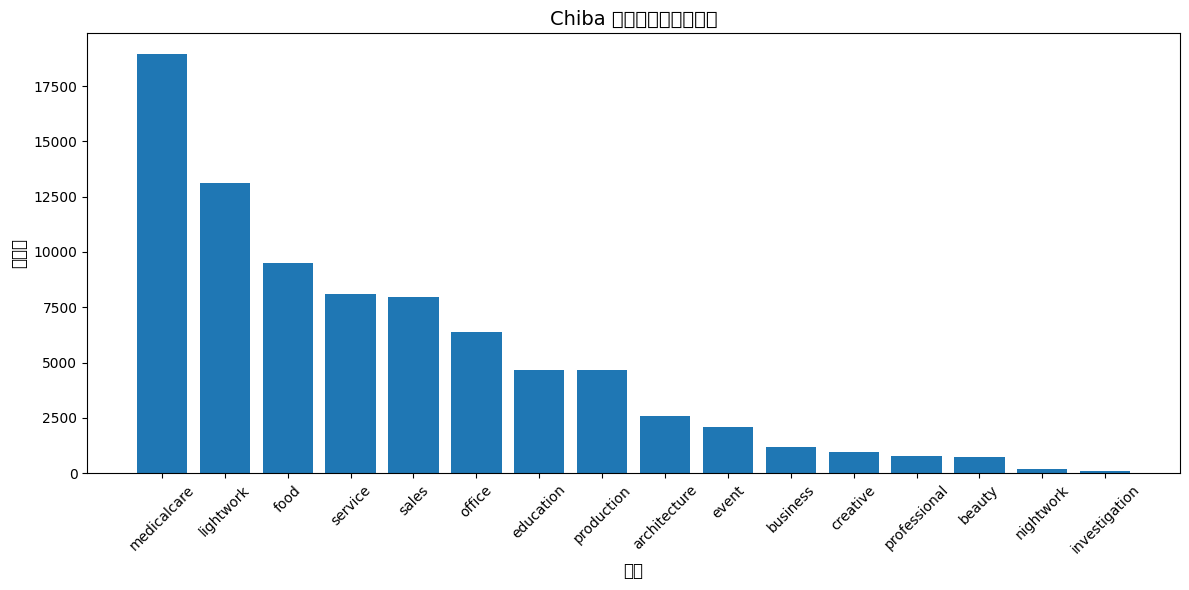

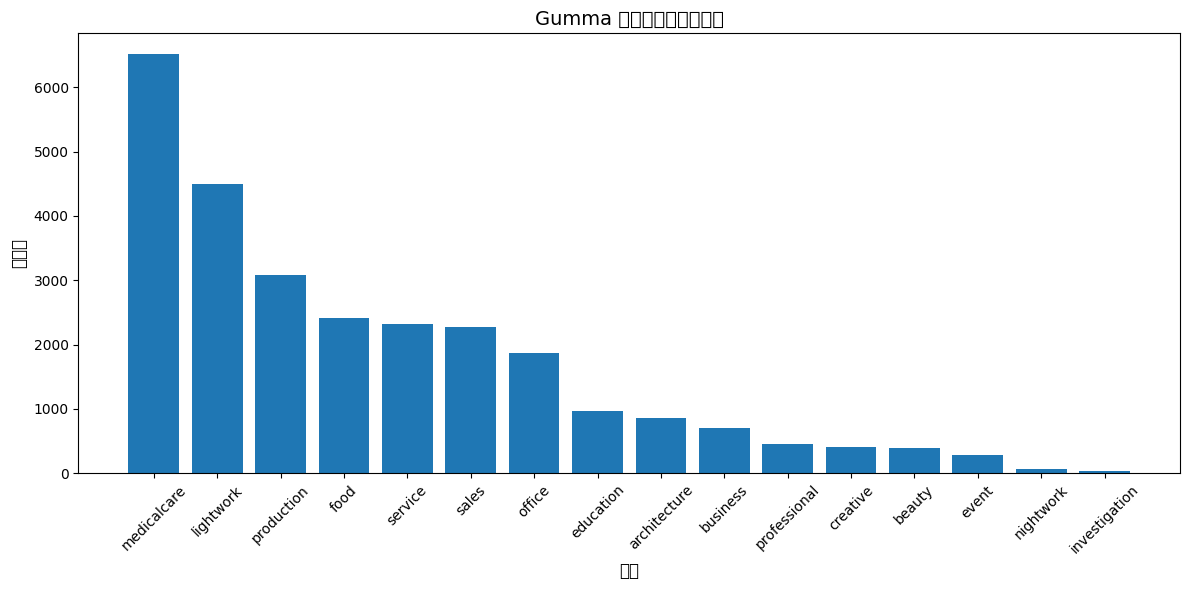

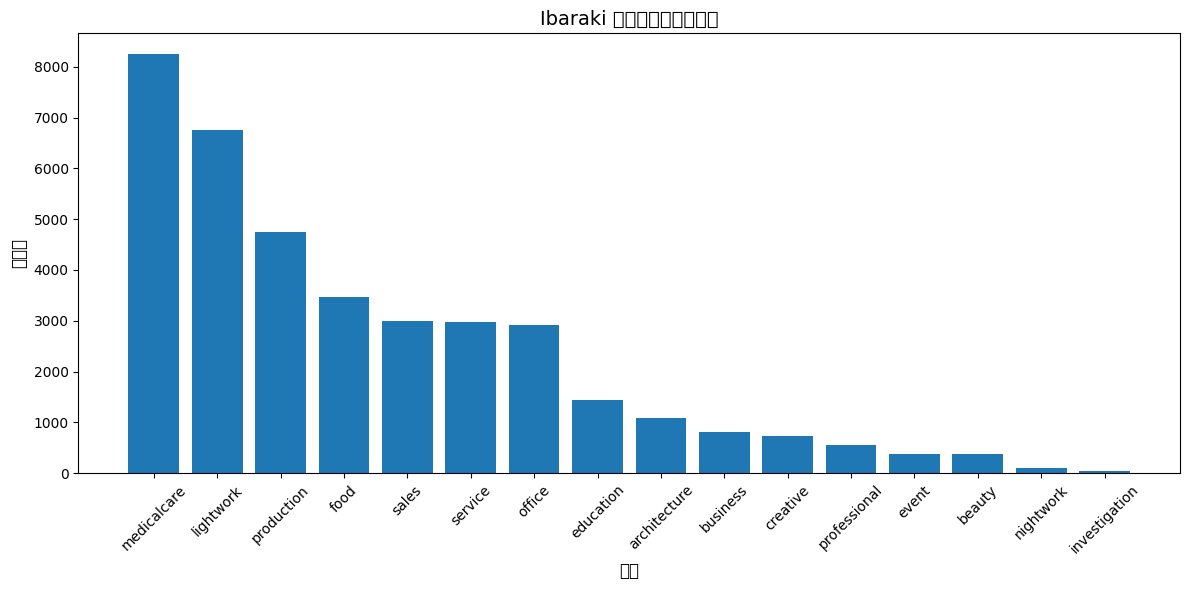

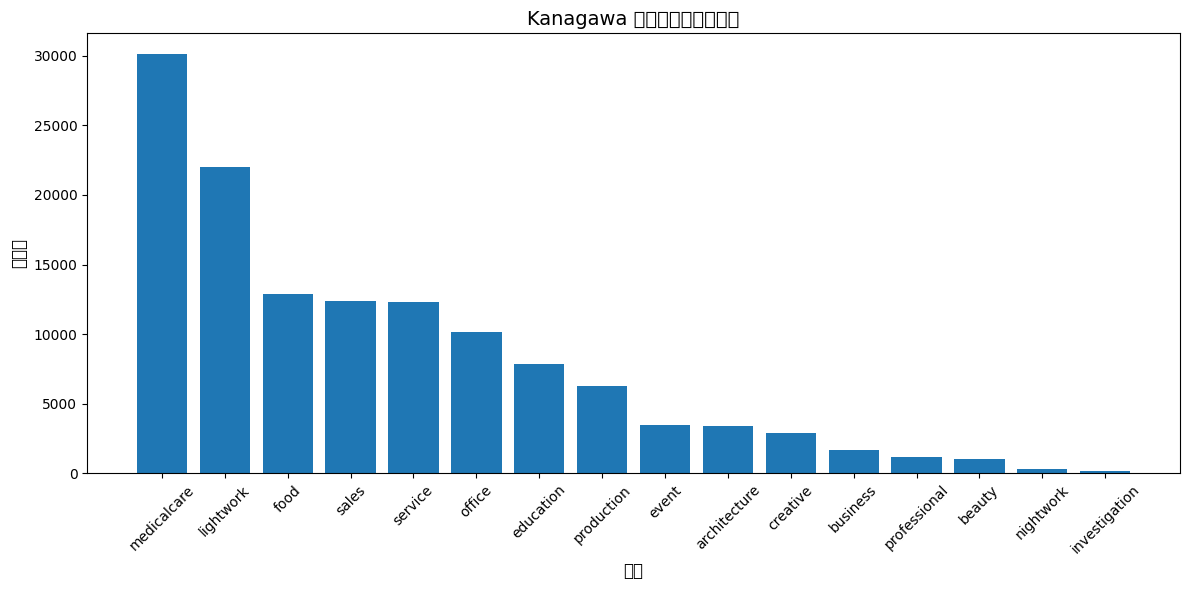

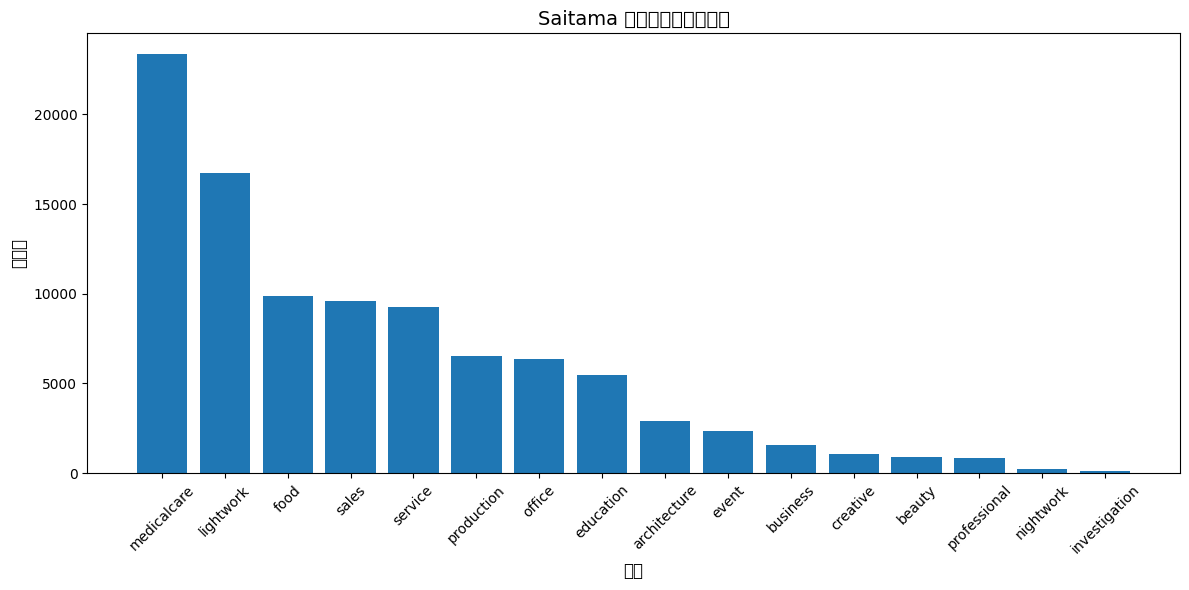

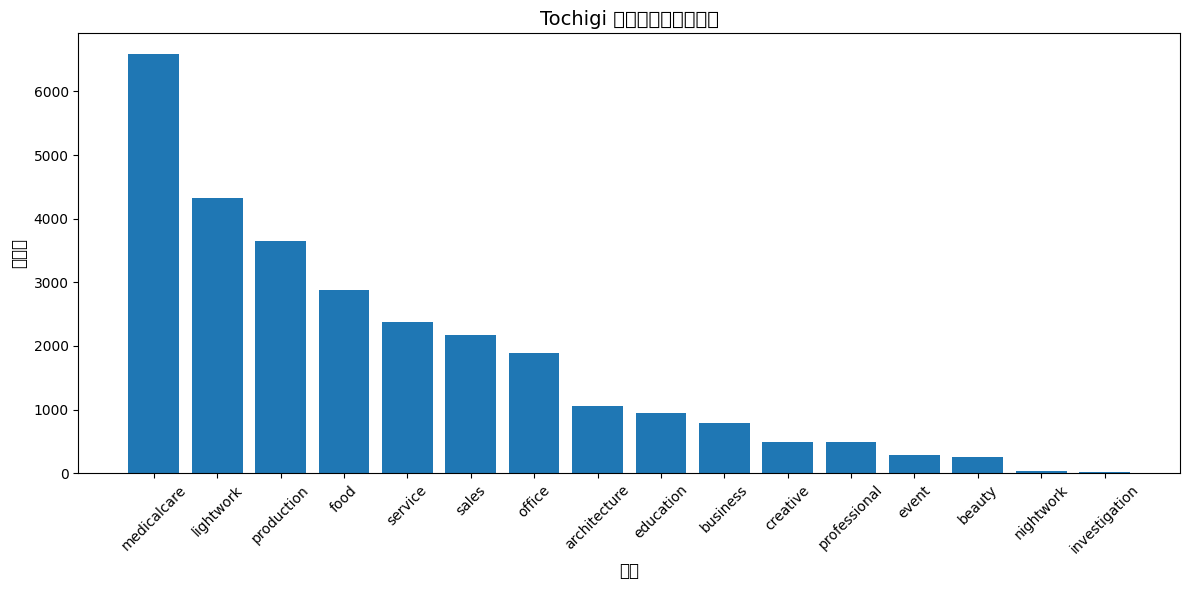

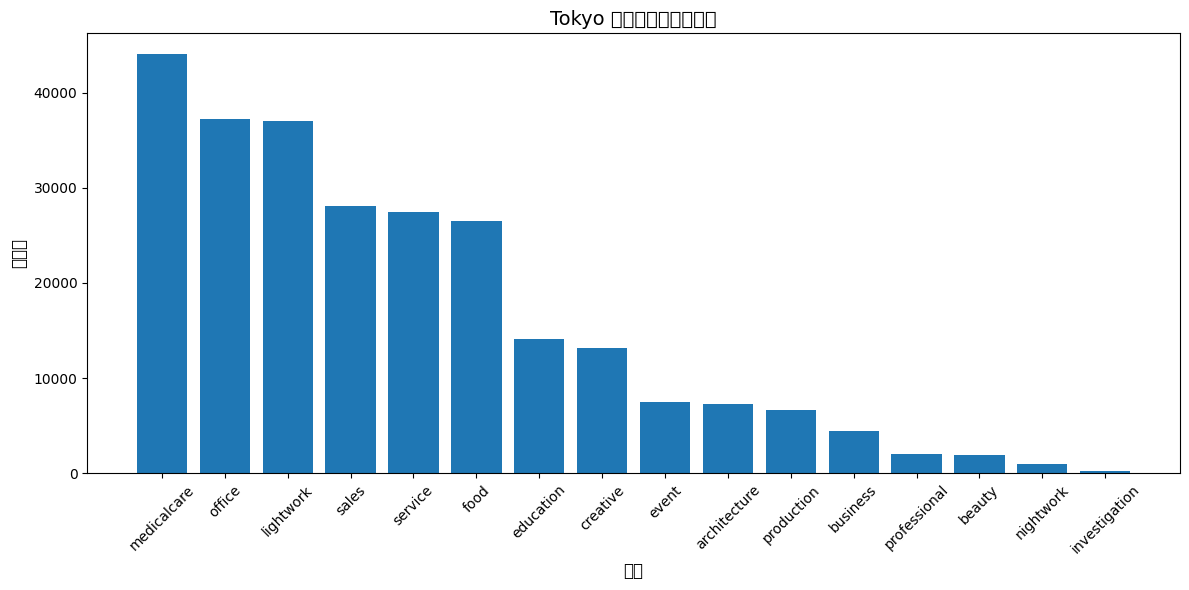

In [15]:
# データベースを再接続して再度実行
conn = sqlite3.connect("job_counts.db")

# 各県ごとに職業ごとの求人数を集計
query = """
SELECT 
    region,
    occupation,
    SUM(count) as total_jobs
FROM job_counts
GROUP BY region, occupation
ORDER BY region, total_jobs DESC
"""
df_detailed = pd.read_sql_query(query, conn)

# データベース接続を閉じる
conn.close()

# 各県ごとに職業ごとの棒グラフを作成
regions = df_detailed['region'].unique()

for region in regions:
    region_data = df_detailed[df_detailed['region'] == region]
    plt.figure(figsize=(12, 6))
    plt.bar(region_data['occupation'], region_data['total_jobs'])
    plt.title(f"{region} の職業ごとの求人数", fontsize=14)
    plt.xlabel("職業", fontsize=12)
    plt.ylabel("求人数", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()
